In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image, ImageOps
from matplotlib.colors import ListedColormap
from tensorboard.plugins.image.summary import image

In [54]:
img = Image.open("meghan_fox.jpg")

MAX_WIDTH = 300

# img = ImageOps.fit(img, (min(img.size), min(img.size)))
# ratio = float(MAX_WIDTH / img.size[0])
# height = int(img.size[1] * ratio)
# img = img.resize((MAX_WIDTH, height))

grayscale_img = img.convert('L')
grayscale_img.show()

Grayscale image array [[ 92  92  91 ...  36  29  25]
 [ 84  84  83 ...  39  34  33]
 [ 81  80  78 ...  43  40  40]
 ...
 [176 174 171 ... 221 221 220]
 [174 172 170 ... 219 219 218]
 [173 171 169 ... 218 217 217]] 


Grayscale image array float [[0.36078431 0.36078431 0.35686275 ... 0.14117647 0.11372549 0.09803922]
 [0.32941176 0.32941176 0.3254902  ... 0.15294118 0.13333333 0.12941176]
 [0.31764706 0.31372549 0.30588235 ... 0.16862745 0.15686275 0.15686275]
 ...
 [0.69019608 0.68235294 0.67058824 ... 0.86666667 0.86666667 0.8627451 ]
 [0.68235294 0.6745098  0.66666667 ... 0.85882353 0.85882353 0.85490196]
 [0.67843137 0.67058824 0.6627451  ... 0.85490196 0.85098039 0.85098039]] 


DFT result [[-2713.        -2.01225703e-11j  2744.37145331+1.09391649e+02j
  -2025.88971647-2.70369001e+02j ...  1944.1026353 -6.28379557e+02j
  -2025.88971647+2.70369001e+02j  2744.37145331-1.09391649e+02j]
 [  969.94587532+2.45368153e+03j  -445.50851786-3.16405187e+03j
    566.18227146+3.51407676e+03j ...

Text(0.5, 1.0, 'Freq Spec shifted')

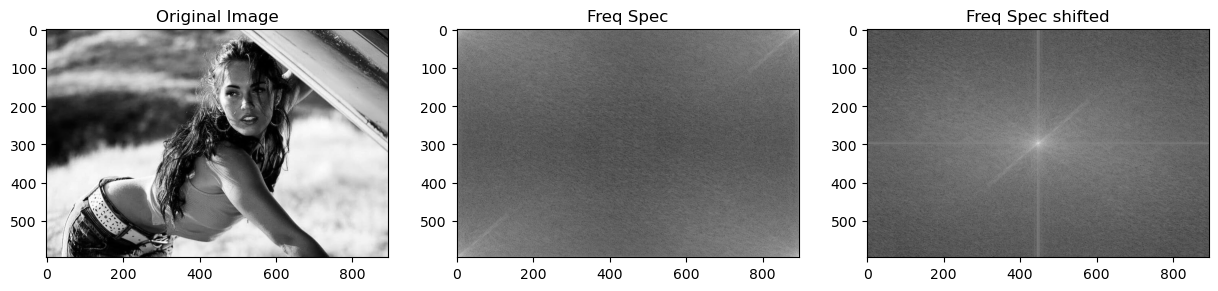

In [55]:
grayscale_img_array = np.array(grayscale_img)
print("Grayscale image array", grayscale_img_array, "\n\n")
# img_back = Image.fromarray(grayscale_img_array)
# print(grayscale_img_array)

grayscale_img_array_float = grayscale_img_array / 255
print("Grayscale image array float", grayscale_img_array_float, "\n\n")

dft = np.fft.fft2(grayscale_img_array)
dft_shifted = np.fft.fftshift(dft)

print("DFT result", dft_shifted, "\n\n")

magnitude_spectrum = np.abs(dft)
magnitude_spectrum_shifted = np.abs(dft_shifted)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(grayscale_img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(np.log(1+magnitude_spectrum), cmap="gray")
plt.title('Freq Spec')

plt.subplot(1, 3, 3)
plt.imshow(np.log(1+magnitude_spectrum_shifted), cmap="gray")
plt.title('Freq Spec shifted')

### Low-pass filter

(596, 894)
(596, 894)
[[ 0.-0.j  0.+0.j  0.-0.j ...  0.+0.j -0.+0.j  0.+0.j]
 [ 0.+0.j  0.-0.j  0.+0.j ...  0.-0.j  0.+0.j  0.-0.j]
 [ 0.+0.j  0.+0.j  0.+0.j ... -0.+0.j  0.+0.j -0.+0.j]
 ...
 [ 0.-0.j  0.+0.j -0.+0.j ...  0.+0.j  0.-0.j  0.+0.j]
 [ 0.+0.j  0.-0.j  0.+0.j ...  0.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -0.+0.j]]
(596, 894)
[[115.32367242+7.46069873e-14j 116.42914577+3.19744231e-14j
  117.61215138+2.13162821e-14j ... 113.51346989+9.94759830e-14j
  113.79308048+4.61852778e-14j 114.41482695+7.10542736e-15j]
 [ 93.11943635+7.39408534e-14j  94.86473358-6.88338275e-15j
   96.68395396+4.34097203e-14j ...  89.54076282+8.37663272e-14j
   90.36701669+6.20059559e-14j  91.58413975+4.60187444e-14j]
 [ 73.73258873+1.51878510e-13j  75.9590031 -2.77555756e-14j
   78.25908611+2.55351296e-14j ...  68.81707449+1.51434421e-13j
   70.05972898+5.88418203e-14j  71.7263563 +1.82076576e-14j]
 ...
 [180.21831716+5.15143483e-14j 179.10340089-1.59872116e-14j
  178.11099

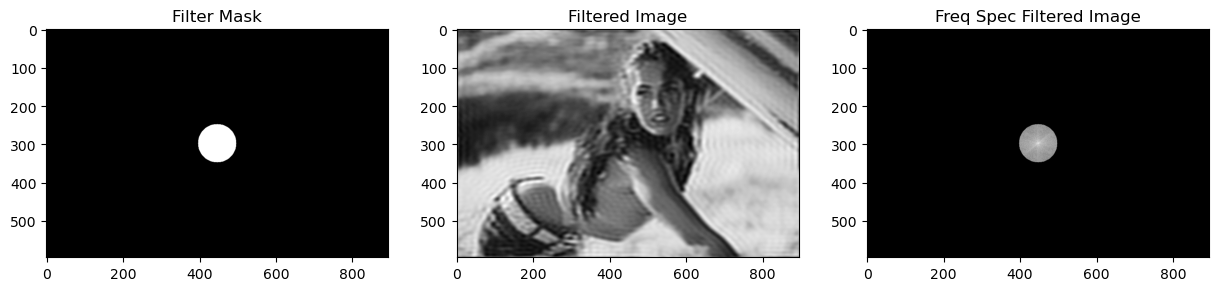

In [56]:
cols, rows = grayscale_img.size
crows, ccols = int(rows/2), int(cols/2)

mask_lp = np.zeros((rows, cols), np.uint8)
r = 50
center = [crows, ccols]
x, y = np.ogrid[:rows, :cols]
mask_area_lp = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r**2
mask_lp[mask_area_lp] = 1

print(dft_shifted.shape)
print(mask_lp.shape)

dft_shift_filt_lp = dft_shifted * mask_lp

print(dft_shift_filt_lp)

dft_ishift_filt_lp = np.fft.ifftshift(dft_shift_filt_lp)

idft_ishift_filt_lp = np.fft.ifft2(dft_ishift_filt_lp)
print(idft_ishift_filt_lp.shape)
print(idft_ishift_filt_lp)

real_idft_ishift_filt_lp = np.real(idft_ishift_filt_lp)
print("\n\n", real_idft_ishift_filt_lp)

real_idft_ishift_filt_lp = (real_idft_ishift_filt_lp - np.min(real_idft_ishift_filt_lp)) / (np.max(real_idft_ishift_filt_lp) - np.min(real_idft_ishift_filt_lp)) * 255
print("\n\n", real_idft_ishift_filt_lp)
print(real_idft_ishift_filt_lp.shape)

img_back = Image.fromarray(real_idft_ishift_filt_lp)
img_back.show()

mag_spec_filt_lp = np.abs(dft_shift_filt_lp)

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(mask_lp, cmap='gray')
plt.title('Filter Mask')

plt.subplot(1, 3, 2)
plt.imshow(real_idft_ishift_filt_lp, cmap="gray", vmin=0, vmax=255)
plt.title('Filtered Image')

plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + mag_spec_filt_lp), cmap="gray")
plt.title('Freq Spec Filtered Image')

plt.show()

### High-pass filter

(596, 894)
(596, 894)
[[-2713.        -2.01225703e-11j  2744.37145331+1.09391649e+02j
  -2025.88971647-2.70369001e+02j ...  1944.1026353 -6.28379557e+02j
  -2025.88971647+2.70369001e+02j  2744.37145331-1.09391649e+02j]
 [  969.94587532+2.45368153e+03j  -445.50851786-3.16405187e+03j
    566.18227146+3.51407676e+03j ...  -244.5568493 -1.51483198e+03j
    663.12733455+1.75956441e+03j  -860.64618318-1.64366378e+03j]
 [  487.92783268-1.37549784e+03j    33.1089676 +7.94655704e+02j
    686.88114243-6.77780553e+02j ...  -604.63744326+6.13704824e+01j
    992.19191547-9.96964686e+01j  -425.73740059+1.03437693e+03j]
 ...
 [ -584.72750955-5.55719257e+02j   972.75815629-1.81021413e+02j
  -1059.09974527+5.00826854e+02j ...  1190.82310706+1.81650571e+02j
   -225.08603229-1.19771207e+02j   665.24967236+7.62058398e+02j]
 [  487.92783268+1.37549784e+03j  -425.73740059-1.03437693e+03j
    992.19191547+9.96964686e+01j ... -2311.90893362-1.92351675e+03j
    686.88114243+6.77780553e+02j    33.1089676 -7.946

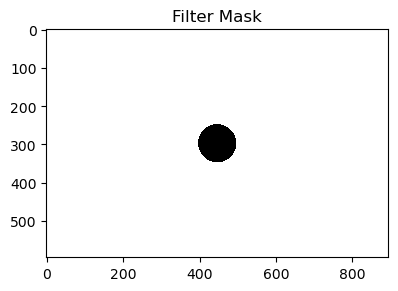

In [67]:
mask_hp = np.ones((rows, cols), np.uint8)
r = 50
center = [crows, ccols]
x, y = np.ogrid[:rows, :cols]
mask_area_hp = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r**2
mask_hp[mask_area_hp] = 0

print(dft_shifted.shape)
print(mask_hp.shape)

dft_shift_filt_hp = dft_shifted * mask_hp

print(dft_shift_filt_hp)

dft_ishift_filt_hp = np.fft.ifftshift(dft_shift_filt_hp)

idft_ishift_filt_hp = np.fft.ifft2(dft_ishift_filt_hp)
print(idft_ishift_filt_hp.shape)
print(idft_ishift_filt_hp)

real_idft_ishift_filt_hp = np.real(idft_ishift_filt_hp)
print("\n\n", real_idft_ishift_filt_hp)

real_idft_ishift_filt_hp = (real_idft_ishift_filt_hp - np.min(real_idft_ishift_filt_hp)) / (np.max(real_idft_ishift_filt_hp) - np.min(real_idft_ishift_filt_hp)) * 255
print("\n\n", real_idft_ishift_filt_hp)
print(real_idft_ishift_filt_hp.shape)

img_back = Image.fromarray(real_idft_ishift_filt_hp)
img_back.show()

mag_spec_filt_hp = np.abs(dft_shift_filt_hp)

mask_cmap = ListedColormap(["black", "white"])

plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(mask_hp, cmap=mask_cmap, vmin=0, vmax=1)
plt.title('Filter Mask')
plt.show()

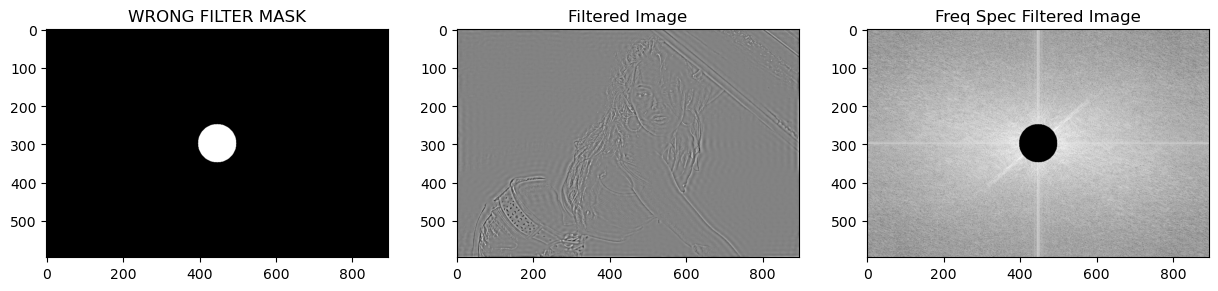

In [58]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(mask_lp, cmap='gray')
plt.title('WRONG FILTER MASK')

plt.subplot(1, 3, 2)
plt.imshow(real_idft_ishift_filt_hp, cmap="gray", vmin=0, vmax=255)
plt.title('Filtered Image')
    
plt.subplot(1, 3, 3)
plt.imshow(np.log(1 + mag_spec_filt_hp), cmap="gray")
plt.title('Freq Spec Filtered Image')

plt.show()

### Image compression

(596, 894, 3)
[[[ 84  99  76]
  [ 84  99  76]
  [ 83  98  75]
  ...
  [ 14  41  70]
  [  7  34  61]
  [  3  30  57]]

 [[ 76  91  68]
  [ 76  91  68]
  [ 75  90  67]
  ...
  [ 17  44  73]
  [ 12  39  68]
  [ 11  38  65]]

 [[ 71  89  67]
  [ 70  88  66]
  [ 68  86  64]
  ...
  [ 19  48  78]
  [ 16  45  75]
  [ 16  46  74]]

 ...

 [[197 177 114]
  [195 175 112]
  [192 172 113]
  ...
  [243 216 189]
  [243 215 191]
  [242 214 190]]

 [[195 175 112]
  [193 173 110]
  [191 171 112]
  ...
  [241 214 187]
  [241 213 189]
  [240 212 188]]

 [[194 174 111]
  [192 172 109]
  [190 170 111]
  ...
  [240 213 186]
  [239 211 187]
  [239 211 187]]]
(596, 894)


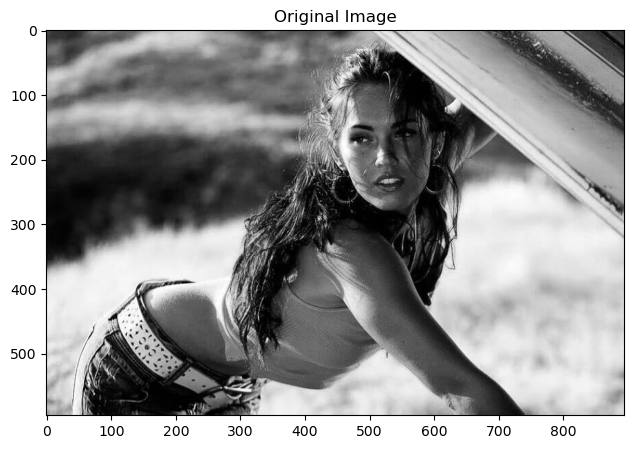

(532824,)
527495
[[ 0.+0.j  0.+0.j -0.+0.j ...  0.-0.j  0.-0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j ...  0.+0.j  0.+0.j -0.+0.j]
 [ 0.-0.j -0.+0.j -0.+0.j ...  0.+0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.-0.j  0.+0.j ...  0.-0.j  0.+0.j  0.+0.j]
 [-0.+0.j  0.+0.j  0.+0.j ...  0.-0.j  0.-0.j  0.-0.j]
 [ 0.+0.j  0.-0.j  0.+0.j ...  0.+0.j  0.+0.j  0.-0.j]]
img_low max:  180.8412616605147
img_low min:  -209.84692357379942


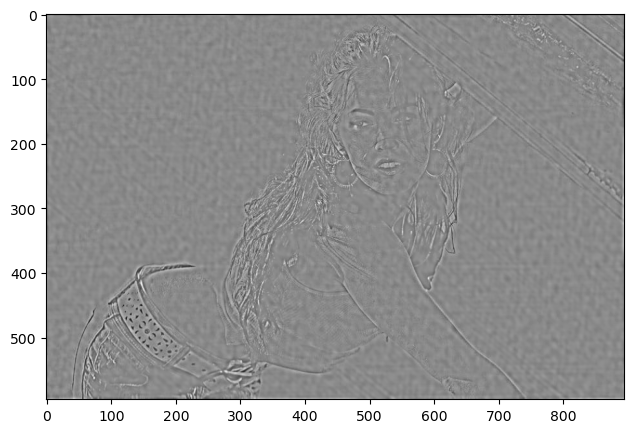

In [59]:


img = imread("meghan_fox.jpg")
img_gray = np.mean(img, -1)
print(img.shape)
print(img)
print(img_gray.shape)

plt.figure(figsize=(8, 5))
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.show()

dft = np.fft.fft2(img_gray)

dft_flatten = dft.flatten()
print(dft_flatten.shape)

sorted_idx = np.argsort(np.abs(dft_flatten))
ind_flatten = np.zeros_like(sorted_idx)
ind_flatten[sorted_idx[:int(0.99*len(dft_flatten))]] = 1
ind = np.reshape(ind_flatten, dft.shape)
dft_low = dft * ind
print(np.count_nonzero(dft_low))
print(dft_low)

img_low = np.fft.ifft2(dft_low).real
print("img_low max: ", img_low.max())
print("img_low min: ", img_low.min())

plt.figure(figsize=(8, 5))
plt.imshow(img_low, cmap="gray", vmin=img_low.min(), vmax=img_low.max())
plt.show()


# plt.figure(figsize=(15, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(mask_lp, cmap='gray')
# plt.title('WRONG FILTER MASK')
# 
# plt.subplot(1, 3, 2)
# plt.imshow(real_idft_ishift_comp, cmap="gray", vmin=0, vmax=255)
# plt.title('Compressed Image')
# 
# plt.subplot(1, 3, 3)
# plt.imshow(np.log(1 + mag_spec_filt_hp), cmap="gray")
# plt.title('Freq Spec Filtered Image')
# 
# plt.show()

Org image min and max: 0 255
Org image shape: (596, 894, 3)
total:  532824 non-zero: 527495 percentage: 0.99


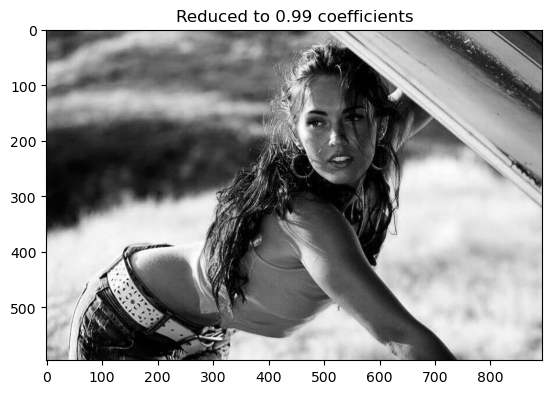

total:  532824 non-zero: 266412 percentage: 0.5


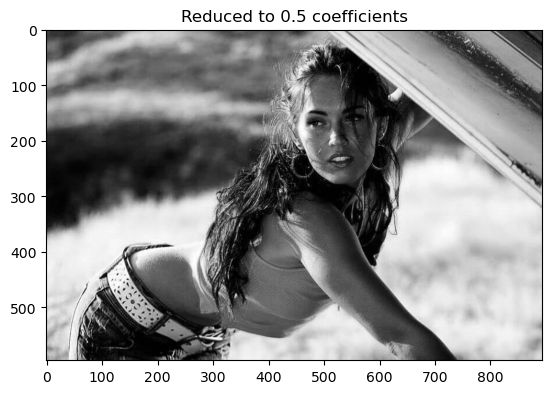

total:  532824 non-zero: 213129 percentage: 0.4


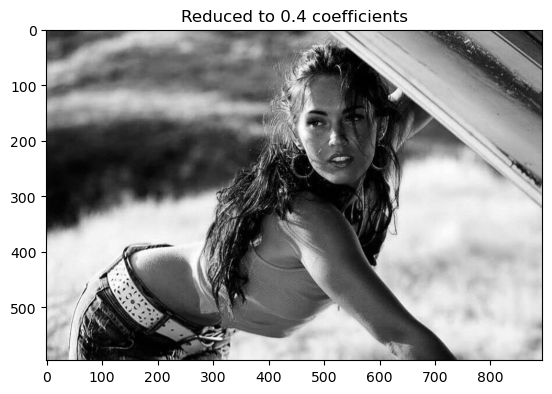

total:  532824 non-zero: 159847 percentage: 0.3


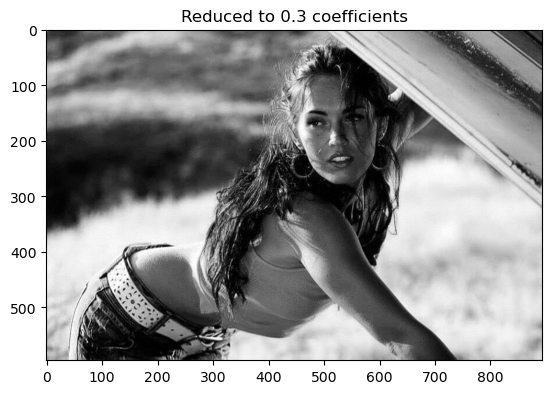

total:  532824 non-zero: 106564 percentage: 0.2


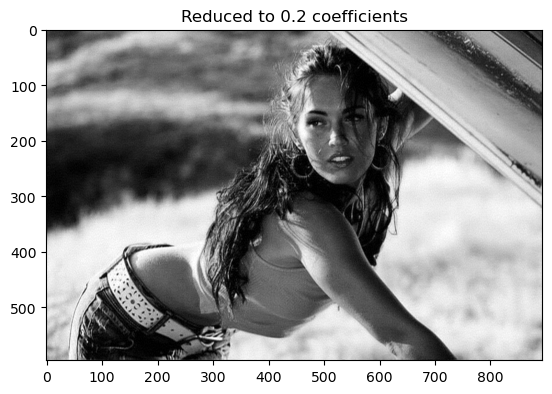

total:  532824 non-zero: 53282 percentage: 0.1


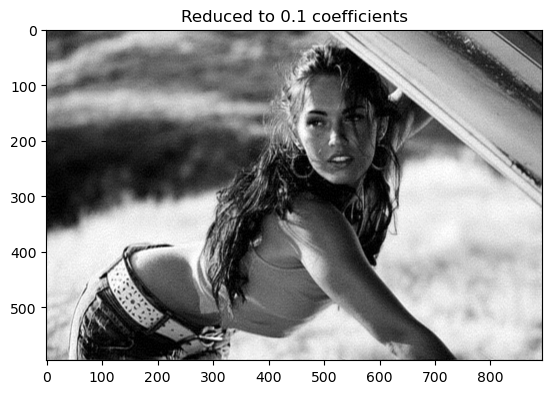

total:  532824 non-zero: 26641 percentage: 0.05


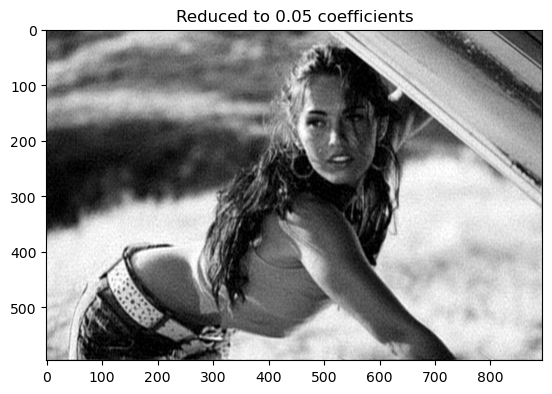

total:  532824 non-zero: 5328 percentage: 0.01


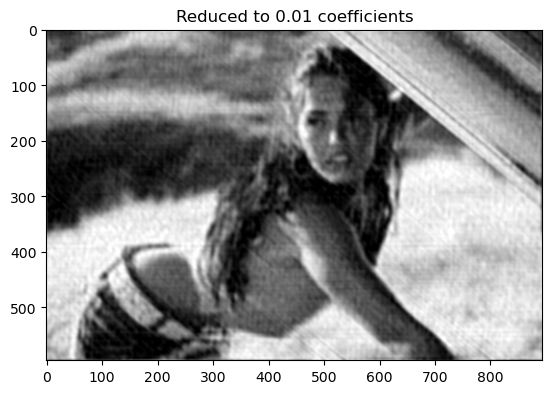

total:  532824 non-zero: 2664 percentage: 0.005


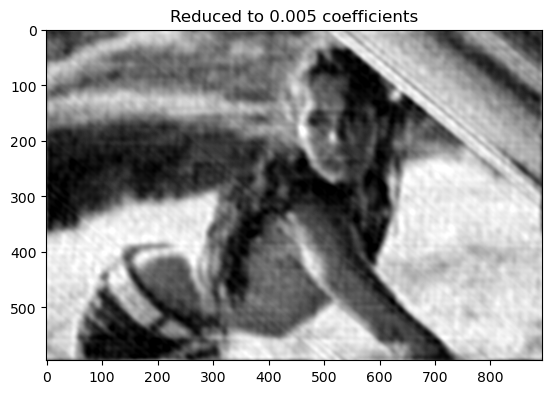

In [60]:
from PIL import Image
capri = imread("meghan_fox.jpg")
print("Org image min and max:", capri.min(), capri.max())
print("Org image shape:", capri.shape)
capri_gray = np.mean(capri, -1)

Bt = np.fft.fft2(capri_gray) # B is grayscale image from above
Bt_sorted = np.argsort(np.abs(Bt.flatten()))[::-1] # Sort by magnitude

for keep in [0.99, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]:
    thresh = np.abs(Bt.flatten()[Bt_sorted[int(np.floor((keep)*len(Bt_sorted)))]])
    ind = np.abs(Bt) > thresh
    print("total: ", ind.size, "non-zero:", np.count_nonzero(ind), "percentage:", np.round(np.count_nonzero(ind)/ind.size, 4))
    Atlow = Bt * ind
    Alow = np.clip(np.fft.ifft2(Atlow).real, 0, 255)

    plt.figure()
    plt.imshow(Alow, cmap="gray")
    plt.title(f"Reduced to {keep} coefficients")
    plt.show()
    meg_back = Image.fromarray(Alow)
    # meg_back.show()

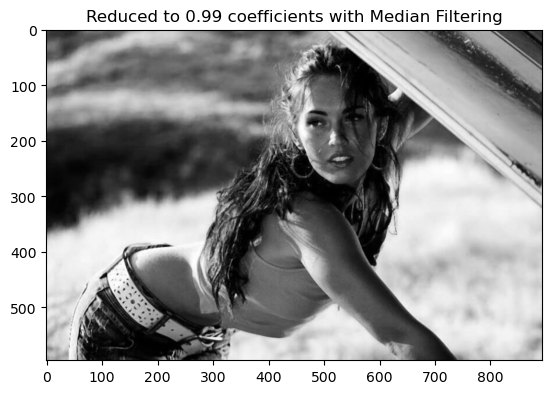

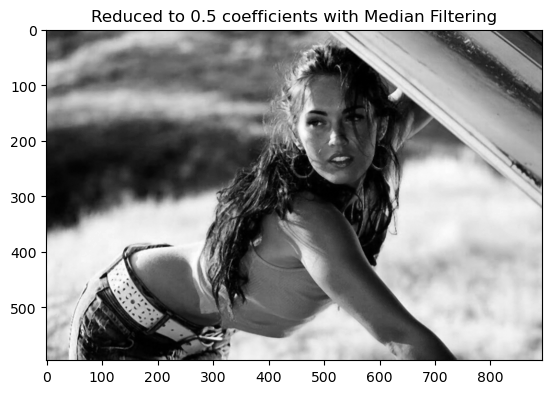

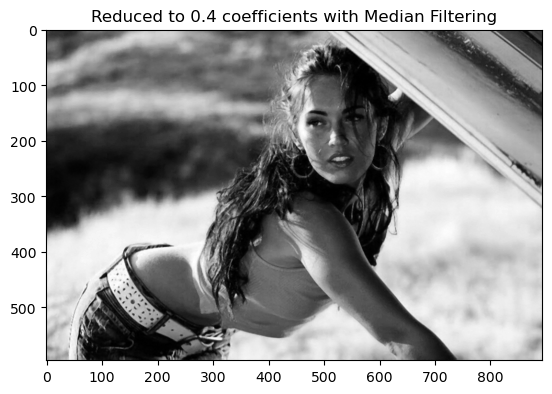

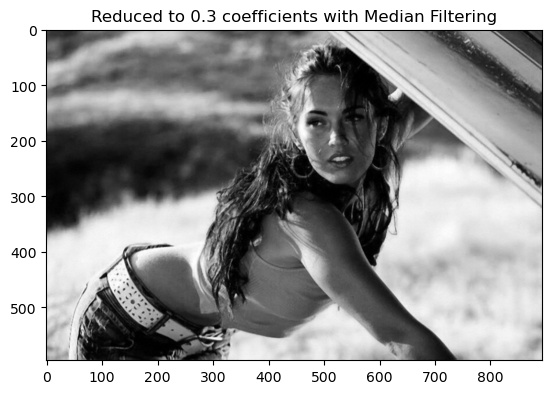

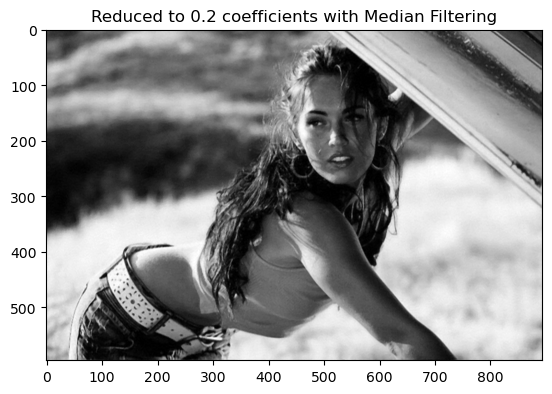

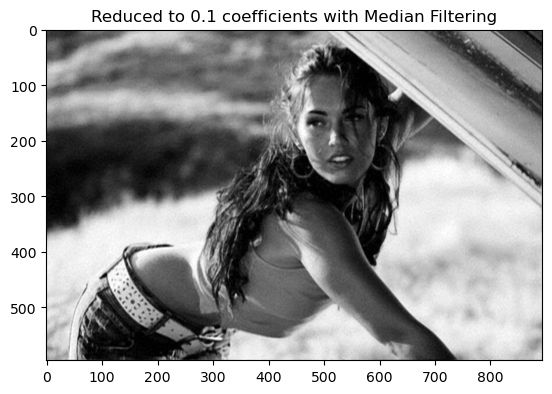

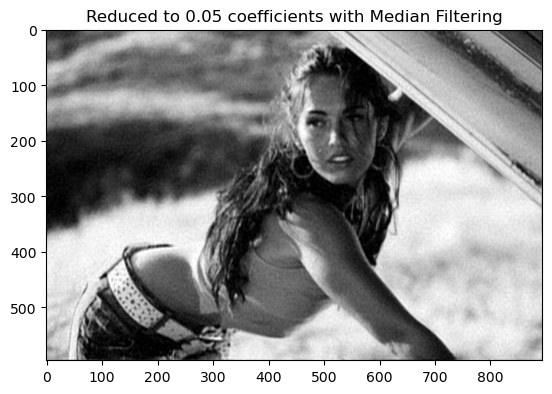

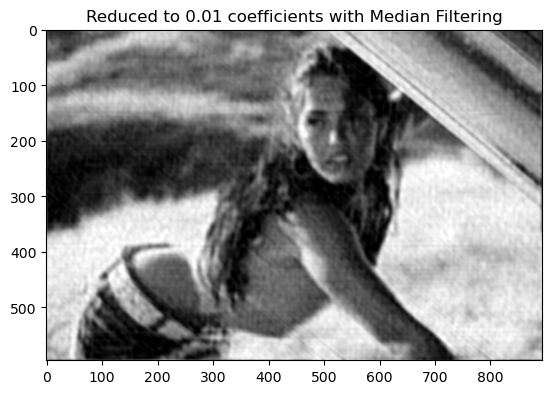

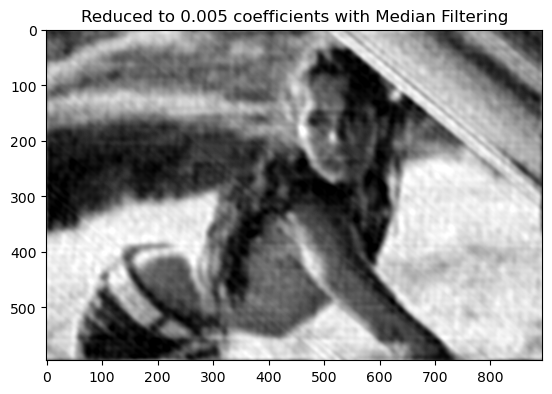

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load and preprocess the image
capri = imread("meghan_fox.jpg")
capri_gray = np.mean(capri, -1)

# Perform Fourier compression as before
Bt = np.fft.fft2(capri_gray)
Bt_sorted = np.argsort(np.abs(Bt.flatten()))[::-1]

for keep in [0.99, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.005]:
    thresh = np.abs(Bt.flatten()[Bt_sorted[int(np.floor((keep) * len(Bt_sorted)))]])
    ind = np.abs(Bt) > thresh
    Atlow = Bt * ind
    Alow = np.clip(np.fft.ifft2(Atlow).real, 0, 255)

    # Apply a median filter to remove spots
    filtered_image = median_filter(Alow, size=3)  # Adjust size as needed

    # Plot the result
    plt.figure()
    plt.imshow(filtered_image, cmap="gray")
    plt.title(f"Reduced to {keep} coefficients with Median Filtering")
    plt.show()
